In [1]:
import pandas as pd

# Load our toy box
df = pd.read_csv('youtube_trending.csv')

# Peek inside!
print("📦 Toy box shape:", df.shape)
print("\n🧸 First 3 toys:")
print(df.head(3))
print("\n🏷️ Toy types (columns):")
print(df.columns.tolist())
print("\n📊 Missing toys:")
print(df.isnull().sum())

📦 Toy box shape: (40950, 16)

🧸 First 3 toys:
             1              2  \
0     video_id  trending_date   
1  2kyS6SvSYSE       17.14.11   
2  1ZAPwfrtAFY       17.14.11   

                                                   3                4  \
0                                              title    channel_title   
1                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
2  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

             5                         6  \
0  category_id              publish_time   
1           22  2017-11-13T17:13:01.000Z   
2           24  2017-11-13T07:30:00.000Z   

                                                   7        8      9  \
0                                               tags    views  likes   
1                                    SHANtell martin   748374  57527   
2  last week tonight trump presidency|"last week ...  2418783  97185   

         10             11                                    

C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\1206837741.py:4: DtypeWarning: Columns (4,7,8,9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('youtube_trending.csv')


In [3]:
# 🔧 SUPER CLEAN - Skip bad header row
df = pd.read_csv('youtube_trending.csv', header=0)  # Read properly

# Set PERFECT names
df.columns = ['video_id', 'trending_date', 'title', 'channel_title', 
              'category_id', 'publish_time', 'tags', 'views', 'likes', 
              'dislikes', 'comment_count', 'thumbnail_link', 
              'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
              'description']

print("✅ Headers fixed!")
print("Shape:", df.shape)
print("\nFirst 2 rows:")
print(df[['title', 'channel_title', 'category_id', 'views', 'likes']].head(2))
print("\nCategory counts:")
print(df['category_id'].value_counts().head(10))
print("\nSample trending_date:", df['trending_date'].head())


✅ Headers fixed!
Shape: (40950, 16)

First 2 rows:
                                title  channel_title  category_id   views  \
0                               title  channel_title  category_id   views   
1  WE WANT TO TALK ABOUT OUR MARRIAGE   CaseyNeistat           22  748374   

   likes  
0  likes  
1  57527  

Category counts:
category_id
24    7771
10    4783
26    3362
23    2781
22    2732
24    2193
25    2173
28    2000
1     1837
17    1811
Name: count, dtype: int64

Sample trending_date: 0    trending_date
1         17.14.11
2         17.14.11
3         17.14.11
4         17.14.11
Name: trending_date, dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\3432680530.py:2: DtypeWarning: Columns (4,7,8,9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('youtube_trending.csv', header=0)  # Read properly


In [4]:
# 🎯 FINAL CLEAN - Remove row 0 junk
df = df.iloc[1:].reset_index(drop=True)

# Fix data types
df['category_id'] = pd.to_numeric(df['category_id'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['dislikes'] = pd.to_numeric(df['dislikes'], errors='coerce')
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')

# Fix date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

print("🎉 CLEAN DATA READY!")
print("Shape:", df.shape)
print("\nFirst 2 PERFECT rows:")
print(df[['title', 'channel_title', 'category_id', 'views', 'likes', 'trending_date']].head(2))
print("\n📈 Top 10 Categories:")
print(df['category_id'].value_counts().sort_index().head(10))


🎉 CLEAN DATA READY!
Shape: (40949, 16)

First 2 PERFECT rows:
                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id    views  likes trending_date  
0           22   748374  57527    2017-11-14  
1           24  2418783  97185    2017-11-14  

📈 Top 10 Categories:
category_id
1     2345
2      384
10    6472
15     920
17    2174
19     402
20     817
22    3210
23    3457
24    9964
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\2284735254.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig('charts/top_categories.png', dpi=300, bbox_inches='tight')
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


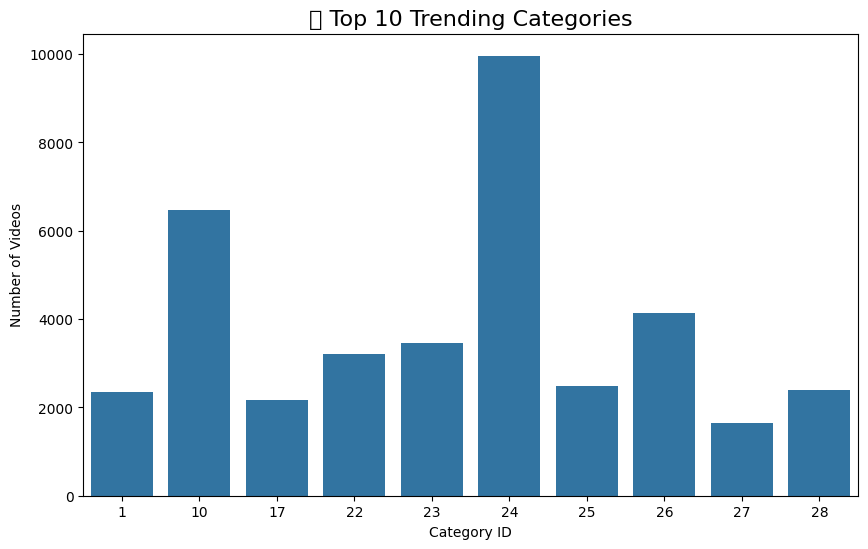

💾 Chart saved: charts/top_categories.png
Top category: 24 (9964 videos)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 TOP CATEGORIES CHART
plt.figure(figsize=(10,6))
cat_counts = df['category_id'].value_counts().head(10)
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.title('🏆 Top 10 Trending Categories', fontsize=16)
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.savefig('charts/top_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Chart saved: charts/top_categories.png")
print("Top category:", cat_counts.index[0], f"({cat_counts.iloc[0]} videos)")


C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\1748562838.py:11: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.
  plt.savefig('charts/views_by_category.png', dpi=300, bbox_inches='tight')
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


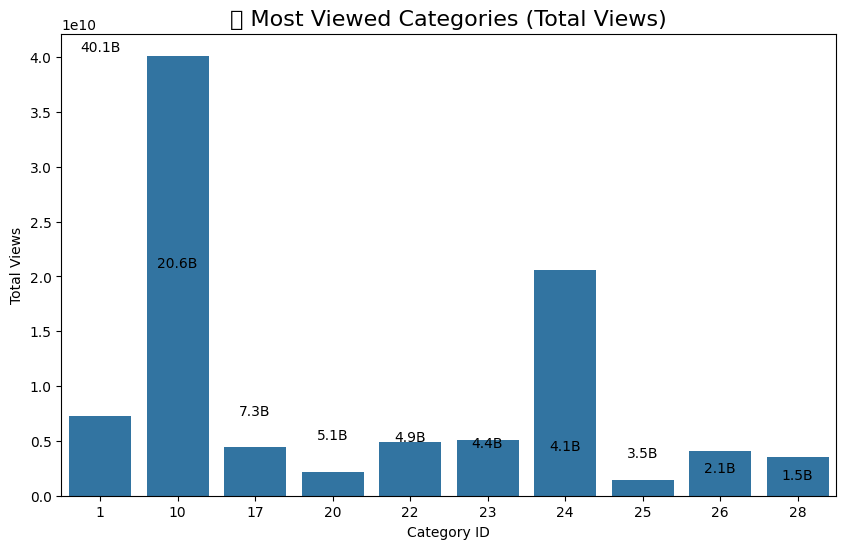

💾 Views chart saved!
Top viewed category: 10 (40,132,892,190 views)


In [6]:
# 🔥 TOTAL VIEWS BY CATEGORY (MOST IMPORTANT!)
plt.figure(figsize=(10,6))
views_by_cat = df.groupby('category_id')['views'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=views_by_cat.index, y=views_by_cat.values)
plt.title('👀 Most Viewed Categories (Total Views)', fontsize=16)
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=0)
for i, v in enumerate(views_by_cat.values):
    plt.text(i, v + v*0.01, f'{v/1e9:.1f}B', ha='center')
plt.savefig('charts/views_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Views chart saved!")
print("Top viewed category:", views_by_cat.index[0], f"({views_by_cat.iloc[0]:,.0f} views)")


C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\3543492764.py:10: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\3543492764.py:11: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.savefig('charts/top_channels.png', dpi=300, bbox_inches='tight')
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


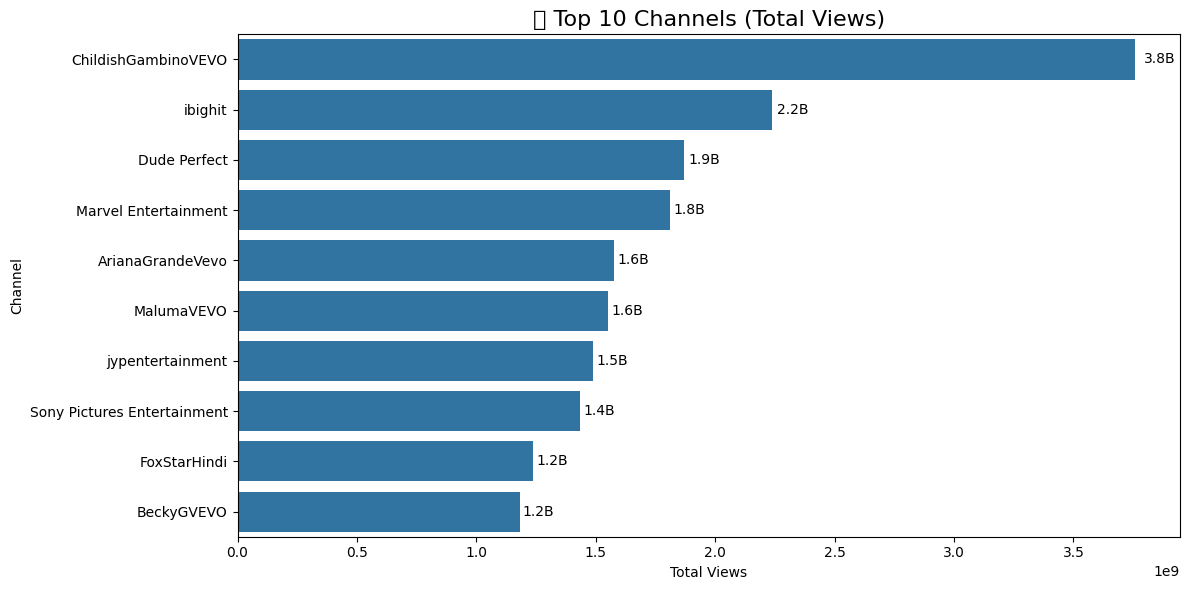

💾 Top channels chart saved!
Top channel: ChildishGambinoVEVO (3,758,488,765 views)


In [7]:
# 👑 TOP 10 CHANNELS by Views
plt.figure(figsize=(12,6))
top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_channels.index, x=top_channels.values)
plt.title('📺 Top 10 Channels (Total Views)', fontsize=16)
plt.xlabel('Total Views')
plt.ylabel('Channel')
for i, v in enumerate(top_channels.values):
    plt.text(v + v*0.01, i, f'{v/1e9:.1f}B', va='center')
plt.tight_layout()
plt.savefig('charts/top_channels.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Top channels chart saved!")
print("Top channel:", top_channels.index[0], f"({top_channels.iloc[0]:,.0f} views)")


C:\Users\DELL\AppData\Local\Temp\ipykernel_8492\1975205326.py:13: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.savefig('charts/trending_duration.png', dpi=300, bbox_inches='tight')
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


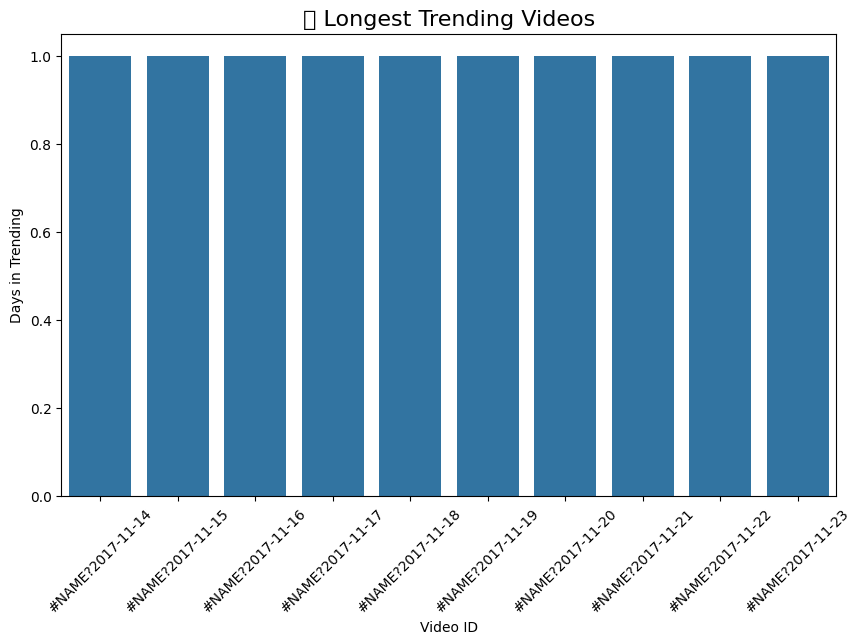

💾 Duration chart saved!
Longest trending: 1 days


In [8]:
# 🕐 HOW LONG VIDEOS TREND (days)
df['video_date'] = df['video_id'] + df['trending_date'].dt.date.astype(str)
trending_duration = df.groupby('video_date')['trending_date'].nunique().reset_index()
trending_duration.columns = ['video_date', 'days_trending']
trending_duration = trending_duration.sort_values('days_trending', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=trending_duration, x='video_date', y='days_trending')
plt.title('⏳ Longest Trending Videos', fontsize=16)
plt.xlabel('Video ID')
plt.ylabel('Days in Trending')
plt.xticks(rotation=45)
plt.savefig('charts/trending_duration.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Duration chart saved!")
print("Longest trending:", trending_duration.iloc[0]['days_trending'], "days")


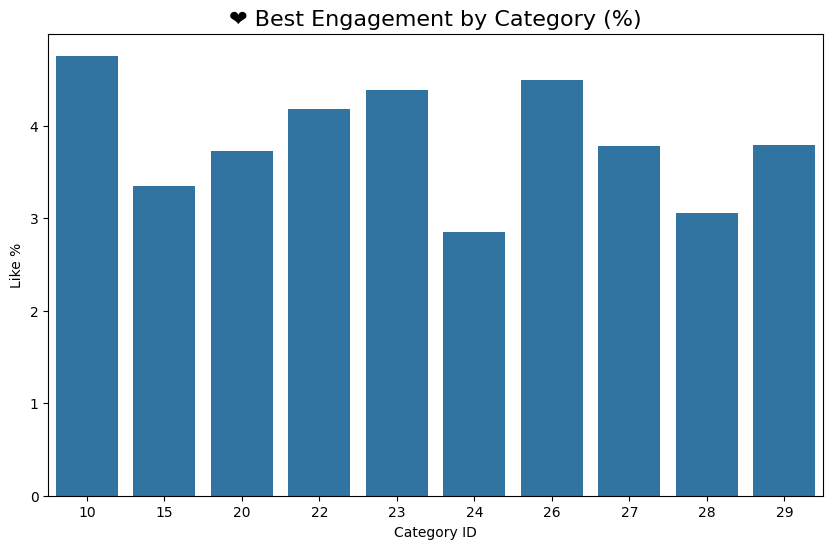

💾 Engagement chart!
Best engagement: 4.76 %


In [9]:
# ❤️ ENGAGEMENT MAGIC
df['engagement'] = (df['likes'] / df['views']) * 100  # % likes per view
engagement_by_cat = df.groupby('category_id')['engagement'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=engagement_by_cat.index, y=engagement_by_cat.values)
plt.title('❤️ Best Engagement by Category (%)', fontsize=16)
plt.xlabel('Category ID')
plt.ylabel('Like %')
plt.savefig('charts/engagement_rate.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Engagement chart!")
print("Best engagement:", round(engagement_by_cat.iloc[0], 2), "%")


In [10]:
df.to_csv('youtube_clean_data.csv', index=False)
print("✅ CLEAN DATA SAVED: youtube_clean_data.csv")


✅ CLEAN DATA SAVED: youtube_clean_data.csv
